In [8]:
from graph import Graph
from johnson import Johnson
from time import sleep, time
from math import log2
from random import randint as rint

time_johnson = {}
time_average = {}

_from = 10
_to = 100

for v in range(_from, _to):
    t = []
    k = 10

    e_number = rint(v*(v-1)//6, v*(v-1)*2//3)
    
    for _ in range(k):
        G = Graph(False, v, e_number)
        t1 = time()
        paths = Johnson(G)
        t2 = time() - t1
        t.append(t2)
    time_johnson[v] = sum(i for i in t)/k
    time_average[v] = (v*v*log2(v)+v*e_number)



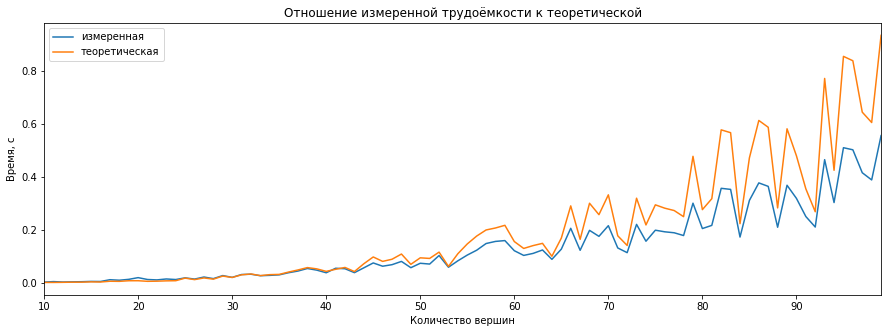

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

t={}

for i in time_average.keys():
    t[i] = time_average[i]/700000
d = {"измеренная": pd.Series(time_johnson), "теоретическая": pd.Series(t)}
df = pd.DataFrame(d)
df.plot(kind='line',figsize=(15,5))
plt.title("Отношение измеренной трудоёмкости к теоретической")
plt.xlabel("Количество вершин")
plt.ylabel("Время, с")
plt.show()

In [16]:
meas = []

_from = 10
_to = 50

for v in range(_from, _to):
    t = []
    k = 10
    e_number = rint(v*(v-1)//6, v*(v-1)*2//3)
    
    for _ in range(k):
        G = Graph(False, v, e_number)
        t1 = time()
        paths = Johnson(G)
        t2 = time() - t1
        t.append(t2)
    _t1 = sum(i for i in t)/k
    
    for _ in range(k):
        G = Graph(False, v*2, e_number*2)
        t1 = time()
        paths = Johnson(G)
        t2 = time() - t1
        t.append(t2)
    _t2 = sum(i for i in t)/k

    meas.append([v, _t1/_t2, (v*log2(v)+e_number)/(v*log2(2*v)+e_number)])  

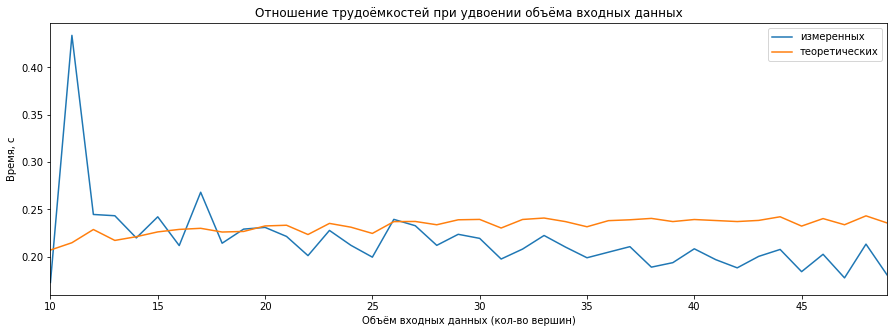

In [17]:
import numpy as np

a1 = np.array(meas)[:,1]
a2 = np.array(meas)[:,2]/4

d1 = {"измеренных": pd.Series(a1, index=[i+10 for i in range(len(a1))]), "теоретических": pd.Series(a2, index=[i+10 for i in range(len(a2))])}
df1 = pd.DataFrame(d1)
df1.plot(kind='line',figsize=(15,5))
plt.title("Отношение трудоёмкостей при удвоении объёма входных данных")
plt.xlabel("Объём входных данных (кол-во вершин)")
plt.ylabel("Время, с")
plt.show()

# This line graph shows the ratio of the measured complexities when data is doubled